# Tracking changes through time

In this lesson, we'll:

* Learn how to manage multiple scenes of the same target at different times
* Visualize changes through time in a consistent manner
* Demonstrate how to quantify change in vegetation area with time

## Importing

We'll start by importing the usual libraries.

In [2]:
import pathlib  # New module we'll be using to find all of the file names of our scenes
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xlandsat as xls

## Data

We'll use scenes from a small section of the southern reaches of the Amazon near the town of [Cláudia in state of Mato Grosso, Brazil](https://www.openstreetmap.org/#map=12/-11.5066/-54.876). The scenes are from the same geographic location but each was taken during the month of August from 2013 until 2022. Our goal is track the amount of deforestation that happened in this area year to year.

Do the following to download the data:

1. Download the cropped scenes from https://doi.org/10.6084/m9.figshare.21932118.v3 (the files end in `-cropped.tar.gz` and should be around 20 Mb each). 
1. Create a folder called `mato-grosso` in the same folder where you put this notebook.
1. Drag and drop the scenes from your computer into the `mato-grosso` folder using the file browser on JupyterLab.

Once we have the files, we can load the scenes into an `xarray.Dataset` using xlandsat. But since there are many files, let's use Python to automate the process of loading each scene. **Our goal is to write some code that will load all of the scenes in the `mato-grosso` folder into a list.**

We'll use the [`pathlib`](https://docs.python.org/3/library/pathlib.html) module to get a list of all file names in the `mato-grosso` folder.

In [4]:
folder = pathlib.Path("mato-grosso/")
scene_files = list(folder.glob("*-cropped.tar.gz"))
scene_files

[PosixPath('mato-grosso/LC08_L2SP_226068_20170828_20200903_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20200804_20200915_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC09_L2SP_226068_20220802_20220804_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20140804_20200911_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20210823_20210901_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20160809_20200906_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20150807_20200908_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20180831_20200831_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20190802_20200827_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20130817_20200913_02_T1-cropped.tar.gz')]

This type of operation is called "globbing". The character `*` represents "any character in any amount". So `"*-cropped.tar.gz"` translates into any file name ending in `-cropped.tar.gz`. We have to convert the output of `.glob` to a list for reasons we won't get into here (do a search for [python iterators](https://www.google.com/search?q=python+iterators) if you're curious).

The files aren't necessarily in order by date, which would be useful when going through our list of scenes (so `scenes[0]` is the earliest in time, for example). We can sort that list using the `sorted` function.

In [6]:
scene_files = sorted(scene_files)
scene_files

[PosixPath('mato-grosso/LC08_L2SP_226068_20130817_20200913_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20140804_20200911_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20150807_20200908_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20160809_20200906_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20170828_20200903_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20180831_20200831_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20190802_20200827_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20200804_20200915_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC08_L2SP_226068_20210823_20210901_02_T1-cropped.tar.gz'),
 PosixPath('mato-grosso/LC09_L2SP_226068_20220802_20220804_02_T1-cropped.tar.gz')]

Notice now that the files are in chronological order. **This only works because the EarthExplorer uses a sensible file naming scheme.** If, for example, their dates were in day/month/year format this wouldn't work. **Watch this [talk by Jennifer Bryan on how to name files](https://youtu.be/ES1LTlnpLMk) to find out more.** If this is all you get out of this whole lesson then I'll be very happy.

Now that we have a list of file names, we can use a `for` loop to iterate over the list and load each scene in turn.

In [7]:
scenes = []
for file_name in scene_files:
    scene = xls.load_scene(file_name)
    scenes.append(scene)

Now we have a list with each scene loaded in chronological order. So this should be the 2013 scene:

In [8]:
scenes[0]

<xarray.Dataset>
Dimensions:   (easting: 2334, northing: 2000)
Coordinates:
  * easting   (easting) float64 7.5e+05 7.5e+05 7.501e+05 ... 8.2e+05 8.2e+05
  * northing  (northing) float64 -1.33e+06 -1.33e+06 ... -1.27e+06 -1.27e+06
Data variables:
    blue      (northing, easting) float16 0.05859 0.05835 ... 0.07678 0.07751
    green     (northing, easting) float16 0.07275 0.07288 ... 0.1139 0.115
    red       (northing, easting) float16 0.06421 0.06445 ... 0.1227 0.1252
    nir       (northing, easting) float16 0.2578 0.2646 0.2803 ... 0.2812 0.2783
Attributes: (12/19)
    Conventions:                CF-1.8
    title:                      Landsat 8 scene from 2013-08-17 (path/row=226...
    digital_object_identifier:  https://doi.org/10.5066/P9OGBGM6
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC08_L2SP_226068_20130817_20200913_02_T1
    processing_level:           L2SP
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2013-08-17
    scene_center_time:          13:46:26.5693620Z
    wrs_path:                   226
    wrs_row:                    68
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

And this should be the 2022 scene:

In [9]:
scenes[-1]

<xarray.Dataset>
Dimensions:   (easting: 2334, northing: 2000)
Coordinates:
  * easting   (easting) float64 7.5e+05 7.5e+05 7.501e+05 ... 8.2e+05 8.2e+05
  * northing  (northing) float64 -1.33e+06 -1.33e+06 ... -1.27e+06 -1.27e+06
Data variables:
    blue      (northing, easting) float16 0.05823 0.05872 ... 0.0835 0.08264
    green     (northing, easting) float16 0.07129 0.07092 ... 0.1045 0.1041
    red       (northing, easting) float16 0.06262 0.06213 ... 0.1409 0.1406
    nir       (northing, easting) float16 0.2445 0.2362 0.2607 ... 0.2773 0.2773
Attributes: (12/19)
    Conventions:                CF-1.8
    title:                      Landsat 9 scene from 2022-08-02 (path/row=226...
    digital_object_identifier:  https://doi.org/10.5066/P9OGBGM6
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC09_L2SP_226068_20220802_20220804_02_T1
    processing_level:           L2SP
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2022-08-02
    scene_center_time:          13:44:30.6903640Z
    wrs_path:                   226
    wrs_row:                    68
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

---

### 🤔 **Your turn** 

Make RGB (true color) composites of each scene and plot them. Set the title of each plot to the date each scene was acquired so we know which is which more easily.

> 💡 **Tip:** The date on which a scene was acquired is stored in `scene.attrs["date_acquired"]`.

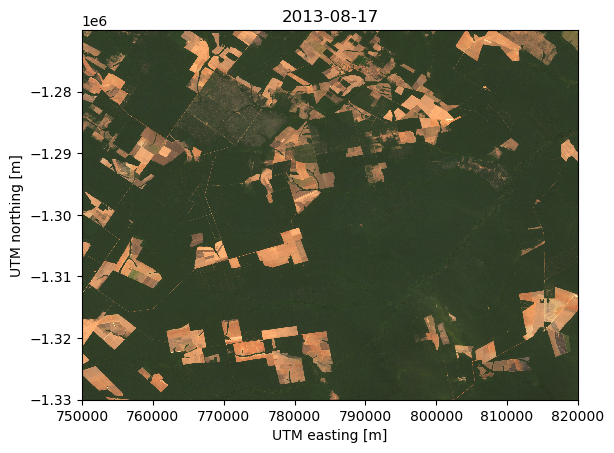

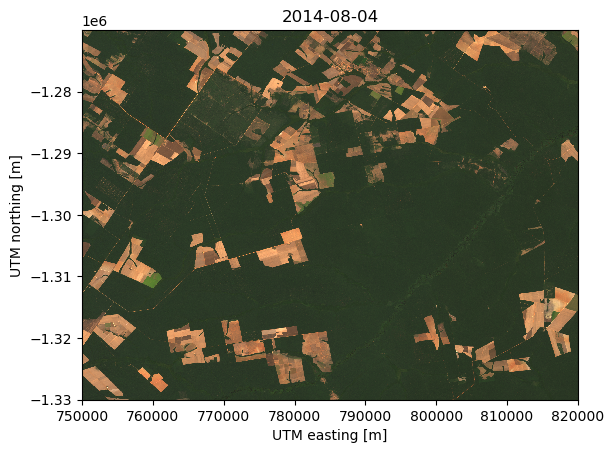

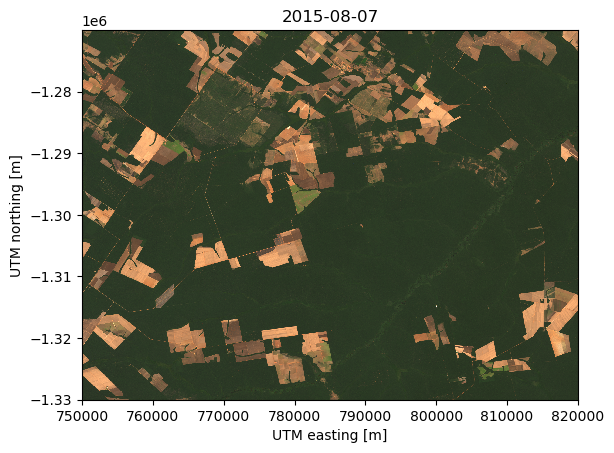

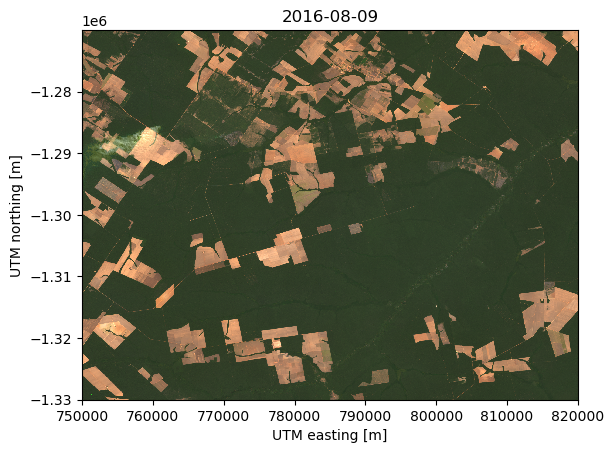

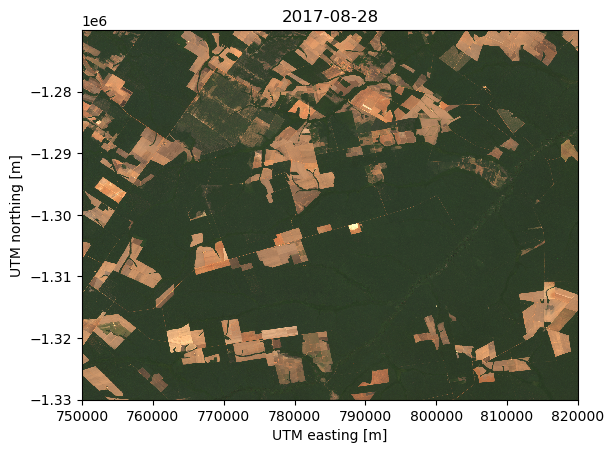

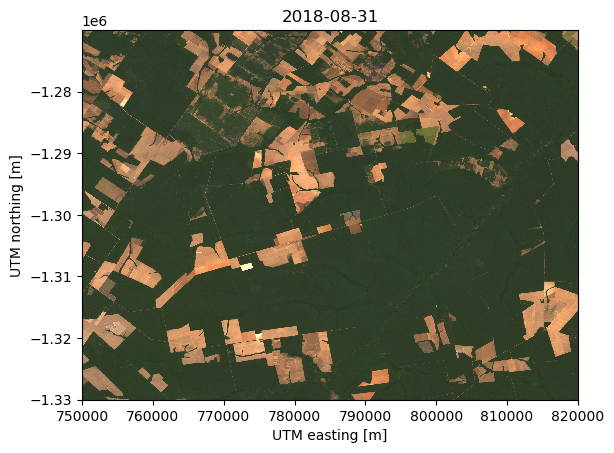

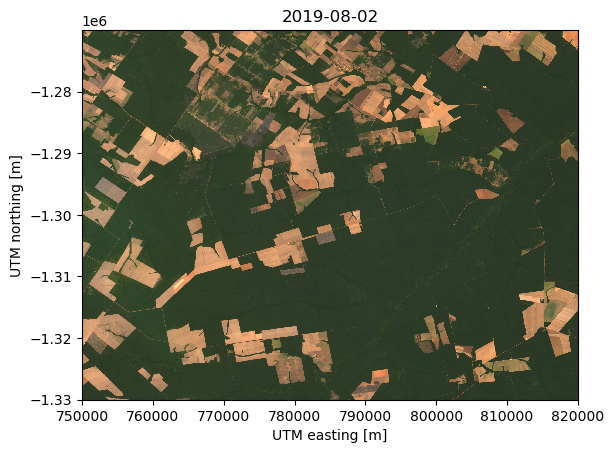

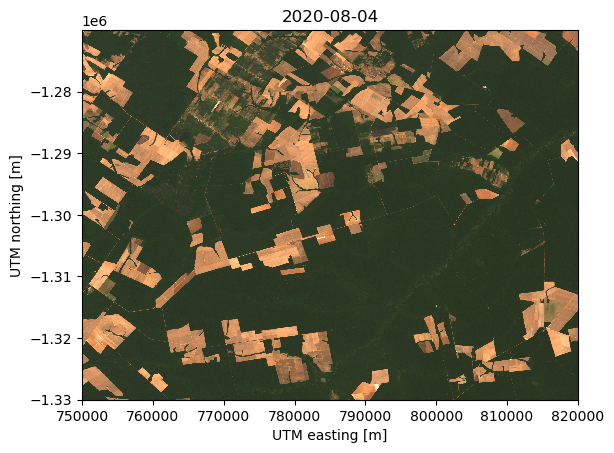

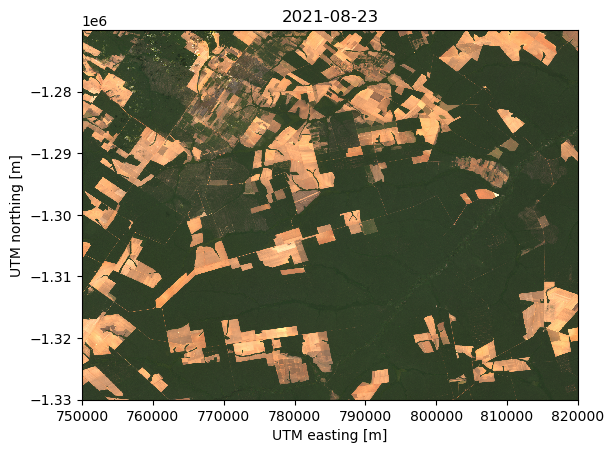

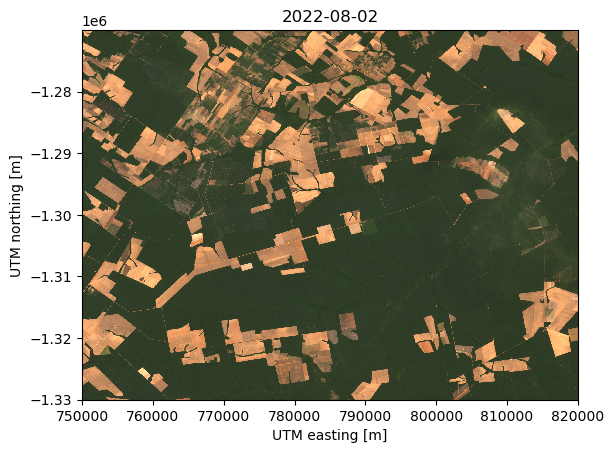

In [17]:
for scene in scenes:
    rgb = xls.composite(scene, rescale_to=[0.03, 0.2])
    plt.figure()
    rgb.plot.imshow()
    plt.title(scene.attrs["date_acquired"])
plt.show()

---

## Track changes in vegetation with the NDVI

Once again, we can use the Normalized Difference Vegetation Index (NDVI) to try to classify pixels into vegetation and not vegetation. Tracking changes to the total area classified as vegetation over time is one way in which we can assess the rate of deforestation.

As a reminder, the NDVI is:

$$ NDVI = \dfrac{NIR - RED}{NIR + RED} $$

We'll once again calculate the NDVI but this time we'll do it for each individual scene in order.

In [18]:
ndvis = []
for scene in scenes:
    ndvi = (scene.nir - scene.red) / (scene.nir + scene.red)
    ndvis.append(ndvi)

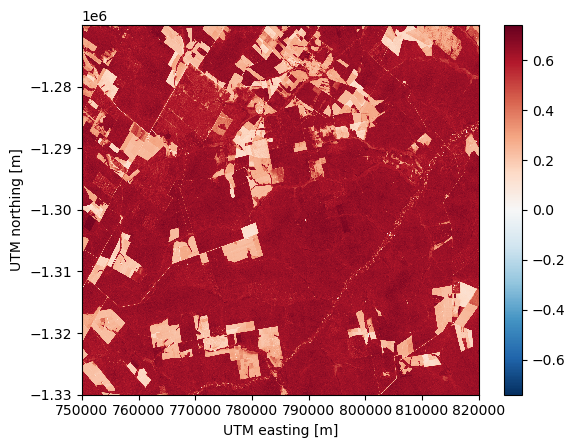

In [22]:
ndvis[1].plot.imshow()

Instead of calculating the whole area of vegetation for each year, we can instead take the difference in NDVI between years. This will highlight only the areas that have changed. It makes for a good visualization and also easier to quantify later on.

Here is how we can do this calculation using a `for` loop:

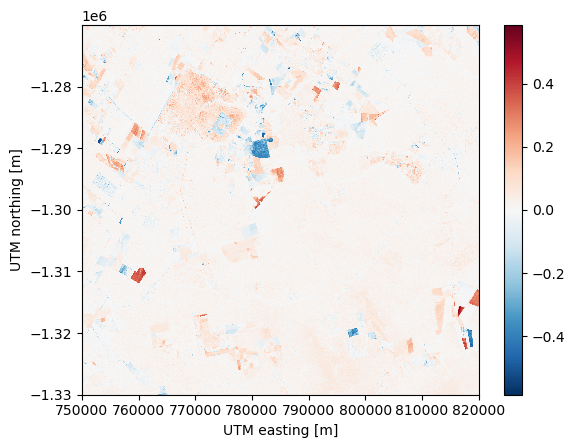

In [23]:
ndvi_diffs = []
for i in range(len(ndvis) - 1): 
    diff = ndvis[i + 1] - ndvis[i]
    ndvi_diffs.append(diff)

ndvi_diffs[0].plot.imshow()

Positive (red) values in this image mean that the NDVI increased in 2014 and negative value means that they decreased.

---

### 🤔 **Your turn** 

Plot each NDVI difference with a for loop. Bonus points for adding a title with the date range for each difference.

> 💡 **Tip:** When looping with indices (`for i in range(...)`), you can iterate over multiple lists at the same time. Which list has the dates for the scenes `i + 1` and `i`?

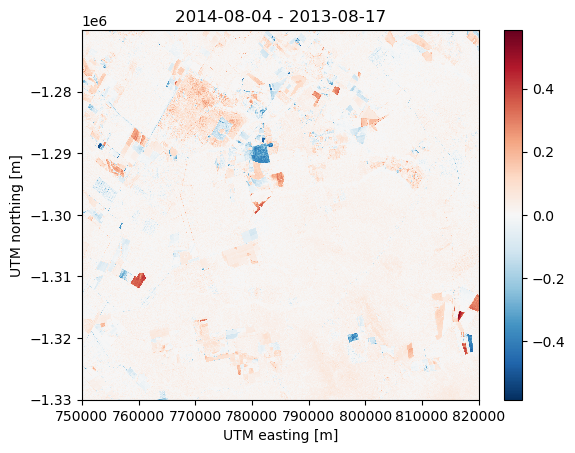

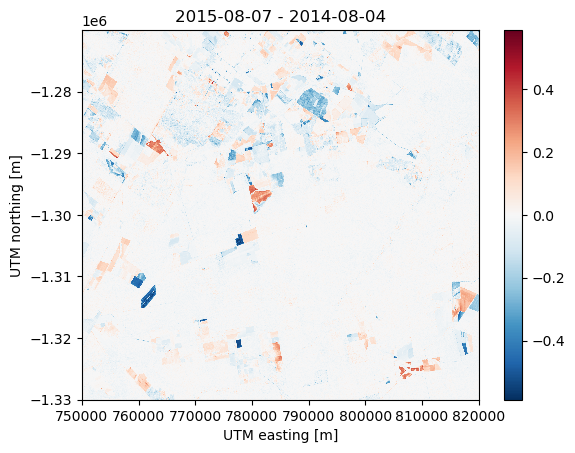

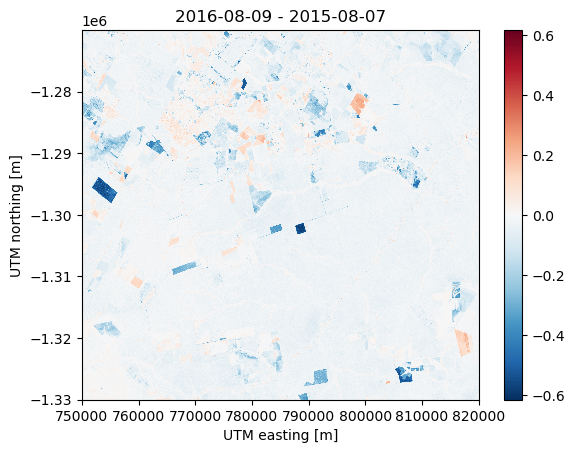

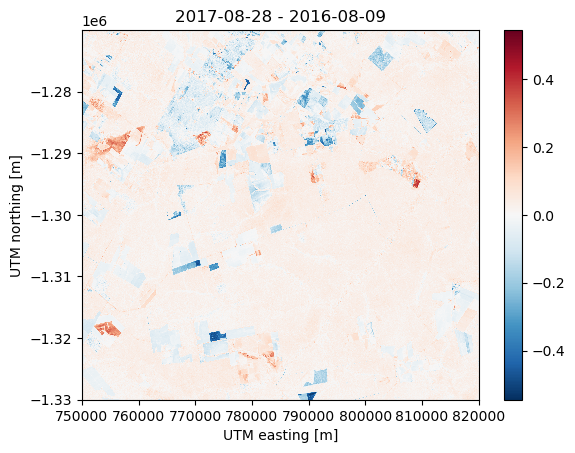

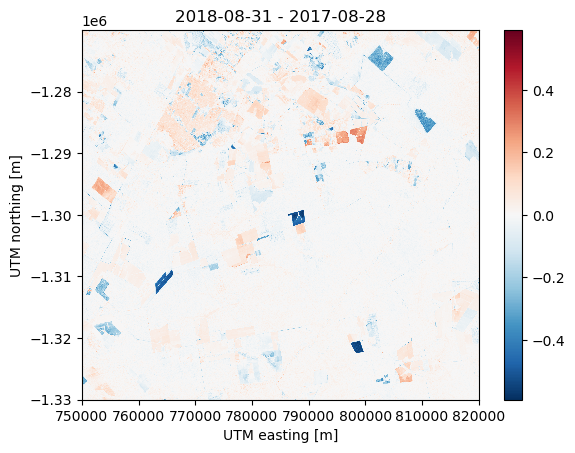

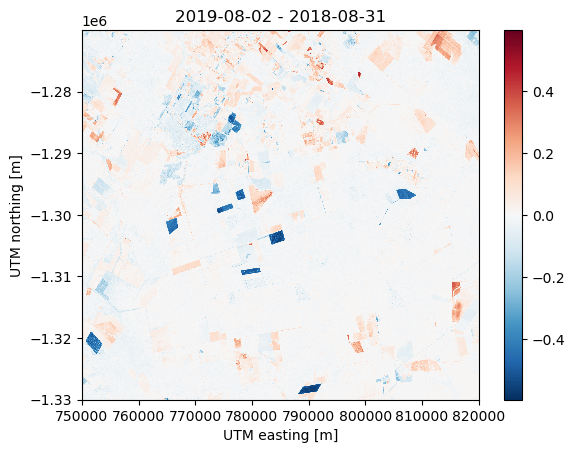

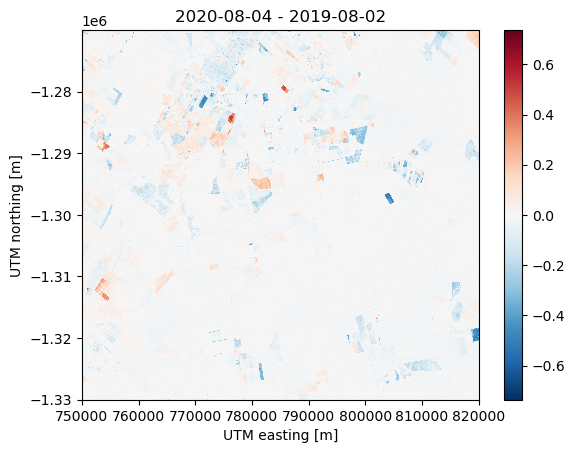

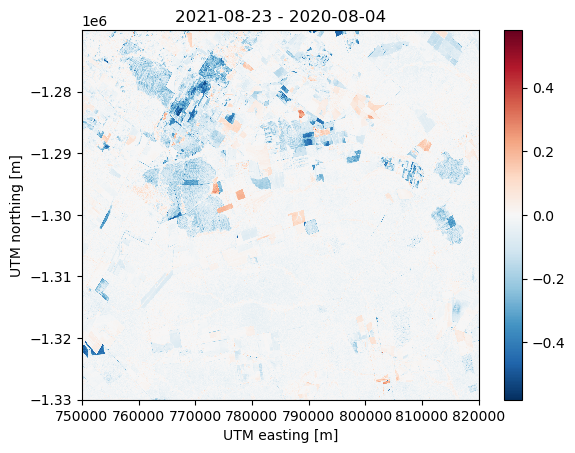

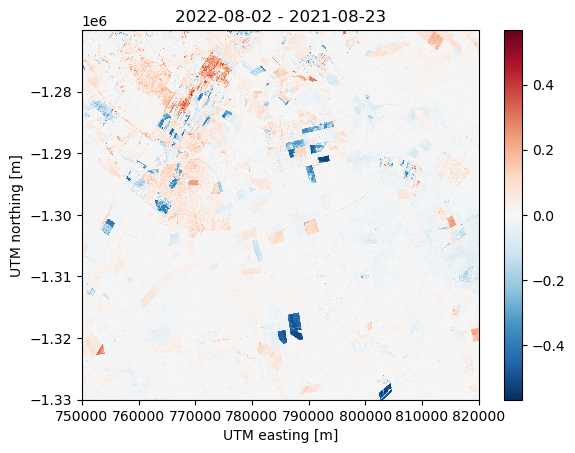

In [24]:
for i in range(len(ndvi_diffs)):
    plt.figure()
    ndvi_diffs[i].plot.imshow()
    title = scenes[i + 1].attrs["date_acquired"] + " - " + scenes[i].attrs["date_acquired"]
    plt.title(title)
plt.show()

----

## Calculating areas

As we did before, we can use these NDVI change values to quantify total area. For example, we can calculate the total area of vegetation lost in each year by counting the number of pixels with NDVI change smaller than -0.2 (or some other negative cut-off value). 

In [32]:
area_vegetation_loss = []
for diff in ndvi_diffs:
    veg_loss = diff < -0.2
    area = veg_loss.sum() * 30**2  # Area of each pixel is 30² m²
    area_vegetation_loss.append(area)

Let's plot this in a bar graph with the year in the x-axis.

Text(0.5, 1.0, 'Vegetation loss')

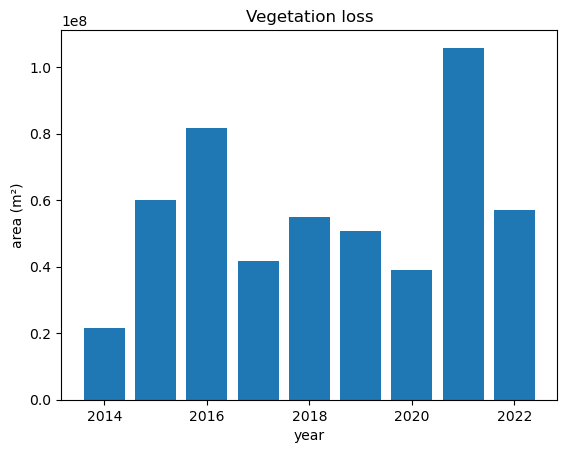

In [33]:
years = np.arange(2014, 2023)

plt.figure()
ax = plt.axes()
ax.bar(years, area_vegetation_loss)
ax.set_xlabel("year")
ax.set_ylabel("area (m²)")
ax.set_title("Vegetation loss")

There seems to be a trend of increased vegetation loss. But we noticed from our NDVI difference plots that there was also some areas where there was regrowth. So maybe it balances out? Let's find out!

---

### 🤔 **Your turn** 

Calculate the area of vegetation gain per year and make another bar plot of it. Also calculate the net vegetation area change (i.e., gain - loss) and plot it in a bar graph as well. 

* What do you see? Does it balance out?
* What are the factors and calculation choices made along the way that impact these results? 
* Does your result change if you change some of those factors?
* What is a **robust conclusion** that you can draw from these findings?